In [1]:
import pandas as pd
encoding = "ISO-8859-1"
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

In [2]:
report_file = "Report-27-03-2018.csv"

In [3]:
report = pd.read_csv(report_file, encoding = encoding)

In [4]:
report

,Symbol,Notifying Member,Date of distribution,Type,Products (free text) (Content in italic is reproduced from the parent notification),Products (HS codes) (Content in italic is reproduced from the parent notification),Products (ICS codes) (Content in italic is reproduced from the parent notification),Objective of measure (Content in italic is reproduced from the parent notification),Link (EN),Link (FR),Link (ES)
0,G/TBT/N/CRI/176,Costa Rica,26/03/2018,Regular notification,NaN,NaN,67.040 - Food products in general;,Protection of human health or safety;,NaN,NaN,ES
1,G/TBT/N/EU/563,European Union,26/03/2018,Regular notification,Biocidal products,NaN,65.100 - Pesticides and other agrochemicals;,Protection of human health or safety; Protecti...,EN,NaN,NaN
2,G/TBT/N/MEX/308/Add.3,Mexico,26/03/2018,Addendum,Eggs and egg products (heading 0407) ;,"0407 - Birds' eggs, in shell, fresh, preserved...",67.120.20 - Poultry and eggs;,Protection of human health or safety;,NaN,NaN,ES
3,G/TBT/N/UGA/643/Add.1,Uganda,26/03/2018,Addendum,Surface polish.,"34 - Soap, organic surface-active agents, wash...",71.100.40 - Surface active agents; \n\n71.100....,Prevention of deceptive practices and consumer...,EN,NaN,NaN
4,G/TBT/N/UGA/685/Add.1,Uganda,26/03/2018,Addendum,Commercial blasting explosives.,36 - Explosives; pyrotechnic products; matches...,71.100.30 - Explosives. Pyrotechnics and firew...,Prevention of deceptive practices and consumer...,EN,NaN,NaN
5,G/TBT/N/UGA/701/Add.1,Uganda,26/03/2018,Addendum,Wall fillers.,NaN,87.040 - Paints and varnishes; \n\n87.040 - Pa...,Prevention of deceptive practices and consumer...,EN,NaN,NaN
6,G/TBT/N/UGA/707/Add.1,Uganda,26/03/2018,Addendum,"Commercial blasting explosives, Ammonium Nitrate.","310230 - - Ammonium nitrate, whether or not in...",71.100.30 - Explosives. Pyrotechnics and firew...,Prevention of deceptive practices and consumer...,EN,NaN,NaN
7,G/TBT/N/UGA/708/Add.1,Uganda,26/03/2018,Addendum,"Commercial blasting explosives, Ammonium Nitra...","310230 - - Ammonium nitrate, whether or not in...",71.100.30 - Explosives. Pyrotechnics and firew...,Prevention of deceptive practices and consumer...,EN,NaN,NaN
8,G/TBT/N/UGA/729/Add.1,Uganda,26/03/2018,Addendum,Illuminating candles.,"34 - Soap, organic surface-active agents, wash...","75.140 - Waxes, bituminous materials and other...","Consumer information, labelling; Prevention of...",EN,NaN,NaN
9,G/TBT/N/UGA/730/Add.1,Uganda,26/03/2018,Addendum,NaN,150810 - - Crude oil; 151110 - - Crude oil; 15...,75.040 - Crude petroleum; \n\n75.040 - Crude p...,Not specified ;,EN,NaN,NaN


In [5]:
# any missing values?
report.isnull().sum()

Symbol                                                                                      0
Notifying Member                                                                            0
Date of distribution                                                                        6
Type                                                                                        0
Products (free text)\n(Content in italic is reproduced from the parent notification)     3354
Products (HS codes)\n(Content in italic is reproduced from the parent notification)     21476
Products (ICS codes)\n(Content in italic is reproduced from the parent notification)    16338
Objective of measure\n(Content in italic is reproduced from the parent notification)    12998
Link (EN)                                                                                  69
Link (FR)                                                                                 177
Link (ES)                                                   

In [6]:
# Symbol
# is it a unique id?
report["Symbol"].value_counts().value_counts()
# mostly, but not completely

# report[ report["Symbol"]=="G/TBT/N/ARE/290#G/TBT/N/BHR/418#G/TBT/N/KWT/301#G/TBT/N/OMN/230#G/TBT/N/QAT/415#G/TBT/N/SAU/885#G/TBT/N/YEM/21"]



1    30324
7      120
2       21
4        4
Name: Symbol, dtype: int64

In [7]:
report["Notifying Member"].value_counts()
# seems legit at first glance - 137 unique members, WTO has 164 members as of 2016
# nothing weird down in the tail

United States of America            3262
Brazil                              1631
European Union                      1499
China                               1428
Israel                              1224
Saudi Arabia, Kingdom of            1061
Mexico                              1031
Canada                              1025
Uganda                              1008
Ecuador                             1005
Korea, Republic of                   936
Japan                                874
Thailand                             741
Kenya                                670
Argentina                            663
Chile                                662
Colombia                             646
Netherlands                          630
Qatar                                556
Bahrain, Kingdom of                  528
Chinese Taipei                       471
Kuwait, the State of                 413
United Arab Emirates                 411
Czech Republic                       388
Oman            

In [8]:
report[report["Date of distribution"].isnull()]
# by positioning alone, these would seem to be pre 16/01/1995 (maybe preceding formal 'distribution' dates?)

,Symbol,Notifying Member,Date of distribution,Type,Products (free text) (Content in italic is reproduced from the parent notification),Products (HS codes) (Content in italic is reproduced from the parent notification),Products (ICS codes) (Content in italic is reproduced from the parent notification),Objective of measure (Content in italic is reproduced from the parent notification),Link (EN),Link (FR),Link (ES)
31216,G/TBT/N/ALB,Albania,NaN,Regular notification,EC Fertilizers.,NaN,NaN,NaN,NaN,NaN,NaN
31217,G/TBT/N/ISR/911,Israel,NaN,Corrigendum,Cutlery and feeding utensils for children (HS:...,"4419 - Tableware and kitchenware, of wood.; 82...",NaN,NaN,NaN,NaN,NaN
31218,G/tbt/N/MEX,Mexico,NaN,Corrigendum,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31219,G/TBT/N/NPL/1,Nepal,NaN,Regular notification,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31220,G/TBT/N/THA,Thailand,NaN,Regular notification,"HCFCs (HS: 2903, 3824; ICS: 13, 81)",NaN,13 - ENVIRONMENT. HEALTH PROTECTION. SAFETY; 8...,Protection of the environment; Other;,NaN,NaN,NaN
31221,G/TBT/N/UKR,Ukraine,NaN,Regular notification,Feed for animals intended for food production,NaN,NaN,Other;,NaN,NaN,NaN


In [9]:
report["Date of distribution"] = pd.to_datetime(report["Date of distribution"])


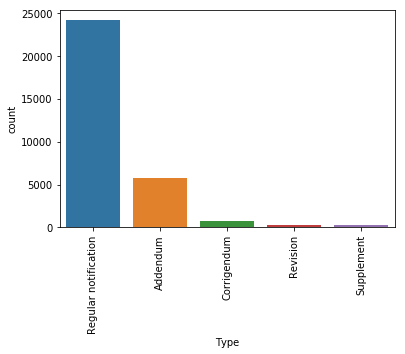

In [10]:
import seaborn as sns
sns.countplot( data = report, x= "Type" )
plt.xticks( rotation=90);

In [11]:
# 'Products (free text)\n(Content in italic is reproduced from the parent notification)'
report[report.columns[4]].value_counts()
# bleurgh - horrible lack of consistent structure

Biocidal products                                                                                                                                                                                                                                                                                    160
Food                                                                                                                                                                                                                                                                                                 133
Cosmetics                                                                                                                                                                                                                                                                                            128
Medical devices                                                                                              

In [12]:
# split_on_semicolons = [ x.strip().split(";") for x in report[report.columns[4]].value_counts().index]
# flattened_split_list = [item.strip() for sublist in split_on_semicolons for item in sublist]
# final_list = list(set(flattened_split_list))
# final_list.remove('')
# final_list, len(final_list)

In [13]:
# 'Products (HS codes)\n(Content in italic is reproduced from the parent notification)'
report[report.columns[5]].value_counts()
# again, awful structure
# also contains huge expanses of whitespace!

8703 - Motor cars and other motor vehicles principally designed for the transport of persons (other than those of heading 87.02), including station wagons and racing cars.;                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [14]:
# split_on_semicolons = [ x.strip().split(";") for x in report[report.columns[5]].value_counts().index]
# flattened_split_list = [item.strip() for sublist in split_on_semicolons for item in sublist]
# final_list = list(set(flattened_split_list))
# final_list.remove('')
# final_list, len(final_list)

In [15]:
# 'Products (ICS codes)\n(Content in italic is reproduced from the parent notification)'
report[report.columns[6]].value_counts()
# again, awful structure
# also contains huge expanses of whitespace!

67.080 - Fruits. Vegetables;                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      358
67.040 - Food products in general;                                                                                                                                                                                                                                                                                                                                                                                                                                

In [16]:
split_on_semicolons = [ x.strip().split(";") for x in report[report.columns[6]].value_counts().index]
flattened_split_list = [item.strip() for sublist in split_on_semicolons for item in sublist]
final_list = list(set(flattened_split_list))
final_list.remove('')
final_list, len(final_list)

(['73.020 - Mining and quarrying',
  '53.040.20 - Components for conveyors',
  '91.140.10 - Central heating systems',
  '23.100.40 - Piping and couplings',
  '01.040.43 - Road vehicle engineering (Vocabularies)',
  '13.120 - Domestic safety',
  '11 - HEALTH CARE TECHNOLOGY',
  '77.140 - Iron and steel products',
  '43.060.40 - Fuel systems',
  '67.120.30 - Fish and fishery products',
  '29.220.30 - Alkaline secondary cells and batteries',
  '13.220.01 - Protection against fire in general',
  '97.220.20 - Winter sports equipment',
  '13.030.99 - Other standards related to wastes',
  '13.040.40 - Stationary source emissions',
  '49.100 - Ground service and maintenance equipment',
  '91.010.30 - Technical aspects',
  '29.120 - Electrical accessories',
  '77.080 - Ferrous metals',
  '13.220.20 - Fire protection',
  '35.220 - Data storage devices',
  '91.140.90 - Lifts. Escalators',
  '11.040.01 - Medical equipment in general',
  '75.080 - Petroleum products in general',
  '95 - MILITARY EN

In [17]:
# 'Objective of measure\n(Content in italic is reproduced from the parent notification)'
report[report.columns[7]].value_counts()
# again, awful structure
# A *lot* better structured/cleaner
# try splitting on semicolons to reduce it even further

Protection of human health or safety;                                                                                                                                                                                                                                    6581
Protection of the environment;                                                                                                                                                                                                                                           1519
Prevention of deceptive practices and consumer protection; Protection of human health or safety;                                                                                                                                                                         1342
Prevention of deceptive practices and consumer protection;                                                                                                                                    

In [18]:
split_on_semicolons = [ x.strip().split(";") for x in report[report.columns[7]].value_counts().index]
flattened_split_list = [item.strip() for sublist in split_on_semicolons for item in sublist]
final_list = list(set(flattened_split_list))
final_list.remove('')
final_list, len(final_list)


(['Harmonization',
  'Protection of human health or safety',
  'Protection of the environment',
  'Other',
  'Quality requirements',
  'Reducing trade barriers and facilitating trade',
  'Cost saving and productivity enhancement',
  'Animal health',
  'Protection of animal or plant life or health',
  'Prevention of deceptive practices and consumer protection',
  'Not specified',
  'National security requirements',
  'Consumer information, labelling'],
 13)

In [19]:
report["Year"] = report["Date of distribution"].apply(lambda x: x.year).astype('category')




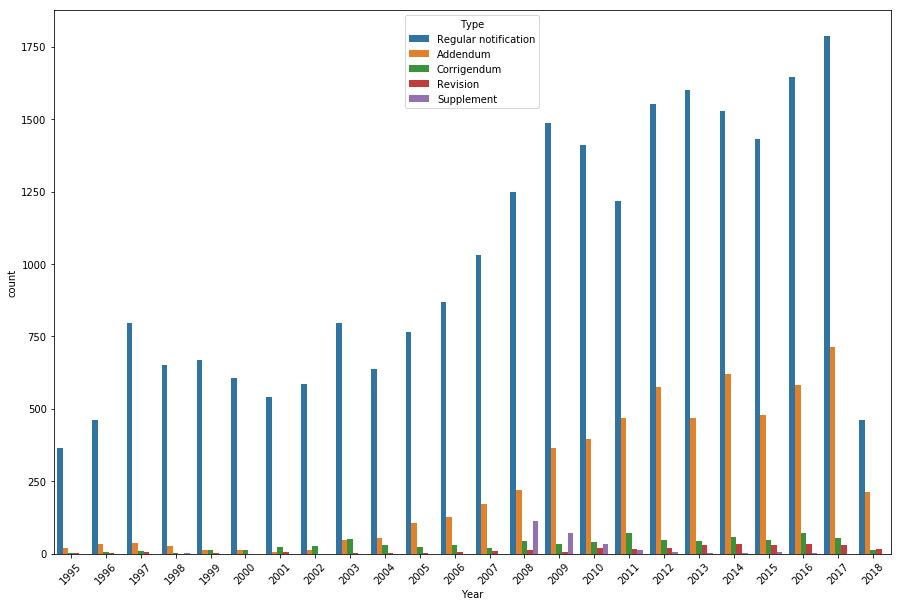

In [20]:
# undisp["Year"] = undisp['Date of distribution'].apply(lambda x: x.year)
# undisp["Type"]
plt.figure(figsize=(15,10));
g = sns.countplot(x=report["Year"], hue=report["Type"]);
g.set_xticklabels(report["Year"].cat.categories.astype('int'), rotation=45);

In [21]:
# looks like these are basically just boolean 
report[['Link (EN)', 'Link (FR)', 'Link (ES)']].apply(lambda x: x.value_counts())

,Link (EN),Link (FR),Link (ES)
EN,31153.0,NaN,NaN
ES,NaN,NaN,31075.0
FR,NaN,31045.0,NaN


In [22]:
# relative counts of each
report[['Link (EN)', 'Link (FR)', 'Link (ES)']].notnull().sum()

Link (EN)    31153
Link (FR)    31045
Link (ES)    31075
dtype: int64

In [23]:
# counts of None/Single/Double/Triples
report[['Link (EN)', 'Link (FR)', 'Link (ES)']].notnull().sum(axis=1).value_counts()

3    31021
1      116
2       47
0       38
dtype: int64

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


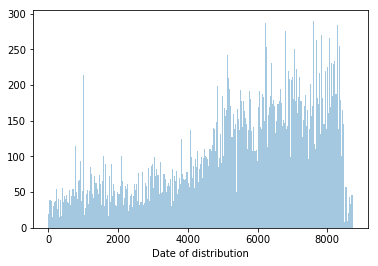

In [46]:
days_since_start = (report["Date of distribution"] - report["Date of distribution"].min()).dropna().apply(lambda x: x.days)
bins = range(0, (report["Date of distribution"].max()-report["Date of distribution"].min()).days, 30)
ax = sns.distplot(days_since_start, norm_hist=False, kde=False, bins = bins)

In [50]:
len(days_since_start)/(report["Date of distribution"].max()-report["Date of distribution"].min()).days
# mean of about 3.5 -> but it's gone up recently

3.5732600732600734